In [82]:
%cd ~/Dropbox/CanvasTools

import pandas as pd
import numpy as np
import nltk

from nltk.corpus import stopwords


#Plotting 
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


import environment
import os
import sys

/Users/adam/Dropbox/CanvasTools


In [2]:
from CanvasTools.FileTools import makeDataFileIterator

# Read and combine data files

In [125]:
dfi = makeDataFileIterator(environment.TEMP_DATA_PATH)
frames = []

try:
    while True:
        dd = pd.read_csv(next(dfi))

        # Each file will have a slightly different name for the answer
        # columns because it has the id for the question prepended.
        # Thus we first normalize the column names
        rename = { c: c.split(':')[1] for c in dd.columns if len(c.split(':'))> 1}

        for k in rename.keys():
            # remove newlines and extra whitespace
            rename[k] = rename[k].replace('\n','').strip()

        dd.rename(rename, axis=1, inplace=True)

        # and store the frame for combination
        frames.append(dd)
except StopIteration:
    data = pd.concat(frames)
    print(len(data))


105


In [124]:
# columns which do not contain text data
nonAnswers = [
    'name', 'id', 'sis_id', 'section', 'section_id', 'section_sis_id',
    'submitted', '1.0', '1.0.1', '1.0.2', '1.0.3', '1.0.4', '1.0.5',
    'n correct', 'n incorrect', 'score'
]

In [127]:
textOnly = data.drop(nonAnswers, axis=1)

In [128]:
textOnly

,What is an example of persuasive advertising?(Don't use Crisp's examples),What is an example of informational advertising?(Don't use Crisp's examples),Why does it matter that the desires activated by persuasive advertising are unconscious?,Give an example of informational advertising which Crisp might find objectionable,"Suppose that a movie theater projectionist accidentally splices a picture of ice cream into a movie so that it appears for the same amount of time as the alleged subliminal advertising Crisp discusses. If someone in the audience buys ice cream due to this influence, is their choice autonomous on Crisp's account?(Hint",Write your own reading comprehension question for students in next year's class. Explain the correct answer.
0,* Pathos in ads is an example of persuasive ad...,Logo's advertising is informational advertisin...,"Because that is the goal of the advertiser, to...",Crisp might find an advertisement against a ce...,"No, their choice is not autonomous. They were...",When would a persuasive advertisement become i...
1,Kanye West's sneakers can be an example of per...,tobacco free advertising are an example of inf...,It matters that the desires activated by persu...,An example of informational advertising which ...,If someone in the audience buys ice cream due ...,Are all rational decisions autonomous and visa...
2,An example of persuasive advertising can be an...,An example of informational advertising could ...,If the desires activated from persuasive adver...,An example of informational advertising that h...,No it is not because Crisp would say that they...,How does persuasive advertisement remove the c...
3,"An example of persuasive advertising, accordin...",An example of informational advertising could ...,It matters that the desires activated by persu...,An example of informational advertising which ...,"No, the agent's choice was not autonomous, acc...",Question: What are the two necessary condition...
4,is advertisement that aims to evoke an action ...,advertisements that set to inform or educate t...,because you had no immediate desire for such p...,an advertisement that sets to inform about its...,"no the choice is not autonomous, because the c...",what are some example advertisements override ...
5,An example of persuasive advertising is the co...,An example of informational advertising could ...,According to Crisp it matter for the desires a...,I recently saw an ad on YouTube about an app c...,"No, there's no choice of autonomous, Crisp wou...",Is Persuasive Advertising Immoral according to...
6,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,An example of a persuasive advertisement would...,An informational ad would be a commercial that...,It matters because we do not know our unconsci...,There are informational ads all the time. Even...,Their choice is autonomus in the sense that th...,Define second-order desire and the impact it m...
9,Persuasive ads are anything that is luring you...,An informational Ad is advertising that inform...,"Often, persuasive advertising uses subliminal ...",A bad example of informational ads would be a ...,It’s not autonomous. Although you are advertis...,Crisp brought out an argument that although pe...


In [123]:
d.columns

Index(['name', 'id', 'sis_id', 'section', 'section_id', 'section_sis_id',
       'submitted',
       'What is an example of persuasive advertising?(Don't use Crisp's examples)',
       '1.0',
       'What is an example of informational advertising?(Don't use Crisp's examples)',
       '1.0.1',
       'Why does it matter that the desires activated by persuasive advertising are unconscious?',
       '1.0.2',
       'Give an example of informational advertising which Crisp might find objectionable',
       '1.0.3',
       'Suppose that a movie theater projectionist accidentally splices a picture of ice cream into a movie so that it appears for the same amount of time as the alleged subliminal advertising Crisp discusses. If someone in the audience buys ice cream due to this influence, is their choice autonomous on Crisp's account?(Hint',
       '1.0.4',
       'Write your own reading comprehension question for students in next year's class. Explain the correct answer.',
       '1.0.5', 'n

In [6]:
qs = [{1 : """1785114: What is an example of persuasive advertising? (Don't use Crisp's examples)""",
 2: """1785115: What is an example of informational advertising? (Don't use Crisp's examples)""",
 3: """1785117: Give an example of informational advertising which Crisp might find objectionable""",
 4: """1785118: Suppose that a movie theater projectionist accidentally splices a picture of ice cream into a movie so that it appears for the same amount of time as the alleged subliminal advertising Crisp discusses. If someone in the audience buys ice cream due to this influence, is their choice autonomous on Crisp's account? (Hint: Look at what he says about the jacket purchase vs. the ice cream case)""",
 5: """1785119: Write your own reading comprehension question for students in next year's class. Explain the correct answer."""
 }]

In [8]:
k = qs[0][1]

In [9]:
k

"1785114: What is an example of persuasive advertising? (Don't use Crisp's examples)"

In [20]:
d

,name,id,sis_id,section,section_id,section_sis_id,submitted,1785114,1.0,1785115,...,1.0.2,1785117,1.0.3,1785118,1.0.4,1785119,1.0.5,n correct,n incorrect,score
0,Christian Gil,101626,200528646,Section 02,38779,2187-14199,2018-09-19 06:48:59 UTC,* Pathos in ads is an example of persuasive ad...,0.0,Logo's advertising is informational advertisin...,...,0.0,Crisp might find an advertisement against a ce...,0.0,"No, their choice is not autonomous. They were...",0.0,When would a persuasive advertisement become i...,0.0,6,0,0.0
1,Natalie Lopez,83933,109829783,Section 02,38779,2187-14199,2018-09-19 05:36:51 UTC,Kanye West's sneakers can be an example of per...,0.0,tobacco free advertising are an example of inf...,...,0.0,An example of informational advertising which ...,0.0,If someone in the audience buys ice cream due ...,0.0,Are all rational decisions autonomous and visa...,0.0,6,0,0.0
2,Nicholas Flores,91152,105029520,Section 02,38779,2187-14199,2018-09-19 03:51:52 UTC,An example of persuasive advertising can be an...,0.0,An example of informational advertising could ...,...,0.0,An example of informational advertising that h...,0.0,No it is not because Crisp would say that they...,0.0,How does persuasive advertisement remove the c...,0.0,6,0,0.0
3,Jaron Hoggan,58663,109329426,Section 02,38779,2187-14199,2018-09-19 00:32:49 UTC,"An example of persuasive advertising, accordin...",0.0,An example of informational advertising could ...,...,0.0,An example of informational advertising which ...,0.0,"No, the agent's choice was not autonomous, acc...",0.0,Question: What are the two necessary condition...,0.0,6,0,0.0
4,Yonatan Castro,117510,200523888,Section 02,38779,2187-14199,2018-09-18 02:10:54 UTC,is advertisement that aims to evoke an action ...,0.0,advertisements that set to inform or educate t...,...,0.0,an advertisement that sets to inform about its...,0.0,"no the choice is not autonomous, because the c...",0.0,what are some example advertisements override ...,0.0,6,0,0.0
5,Deborah Durodola,2806,106090099,Section 02,38779,2187-14199,2018-09-17 23:09:09 UTC,An example of persuasive advertising is the co...,0.0,An example of informational advertising could ...,...,0.0,I recently saw an ad on YouTube about an app c...,0.0,"No, there's no choice of autonomous, Crisp wou...",0.0,Is Persuasive Advertising Immoral according to...,0.0,6,0,0.0
6,Patrick Diaz,49223,108652334,Section 02,38779,2187-14199,2018-09-17 16:30:00 UTC,NaN,0.0,NaN,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,6,0,0.0
7,Simon Bonoughounian,77598,109644702,Section 02,38779,2187-14199,2018-09-17 16:30:00 UTC,NaN,0.0,NaN,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,6,0,0.0
8,Talin Shahnazarian,58893,109335640,Section 02,38779,2187-14199,2018-09-17 16:30:00 UTC,An example of a persuasive advertisement would...,0.0,An informational ad would be a commercial that...,...,0.0,There are informational ads all the time. Even...,0.0,Their choice is autonomus in the sense that th...,0.0,Define second-order desire and the impact it m...,0.0,6,0,0.0
9,Kristine Charis Ramirez,117646,200611144,Section 02,38779,2187-14199,2018-09-17 16:25:08 UTC,Persuasive ads are anything that is luring you...,0.0,An informational Ad is advertising that inform...,...,0.0,A bad example of informational ads would be a ...,0.0,It’s not autonomous. Although you are advertis...,0.0,Crisp brought out an argument that although pe...,0.0,6,0,0.0


# Process answers

In [104]:
import string
remove = [ '``', "''", "'s"]
remove += string.punctuation
remove += stopwords.words('english')
remove = set(remove)

def make_wordbag(text):
    return [word.lower() for sent in nltk.tokenize.sent_tokenize(text) for word in nltk.tokenize.word_tokenize(sent) if word.lower() not in remove]


In [130]:
# wordbags by student
individ = {}
# all student bags combined
combos = {}

for c in textOnly.columns:
    print(c)
    w = textOnly[c]
    individ[c] = [make_wordbag(str(a)) for _, a in w.iteritems()]
    combos[c] = [w for words in individ[c] for w in words]

What is an example of persuasive advertising?(Don't use Crisp's examples)
What is an example of informational advertising?(Don't use Crisp's examples)
Why does it matter that the desires activated by persuasive advertising are unconscious?
Give an example of informational advertising which Crisp might find objectionable
Suppose that a movie theater projectionist accidentally splices a picture of ice cream into a movie so that it appears for the same amount of time as the alleged subliminal advertising Crisp discusses. If someone in the audience buys ice cream due to this influence, is their choice autonomous on Crisp's account?(Hint
Write your own reading comprehension question for students in next year's class. Explain the correct answer.


# Answer lengths

Calclulate the wordcount for each answer, excluding stopwords

In [165]:
individual_counts = {}
for c in individ.keys():
    individual_counts[c] = [len(b) for b in individ[c]]

/Users/adam/.pyenv/versions/3.6.4/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


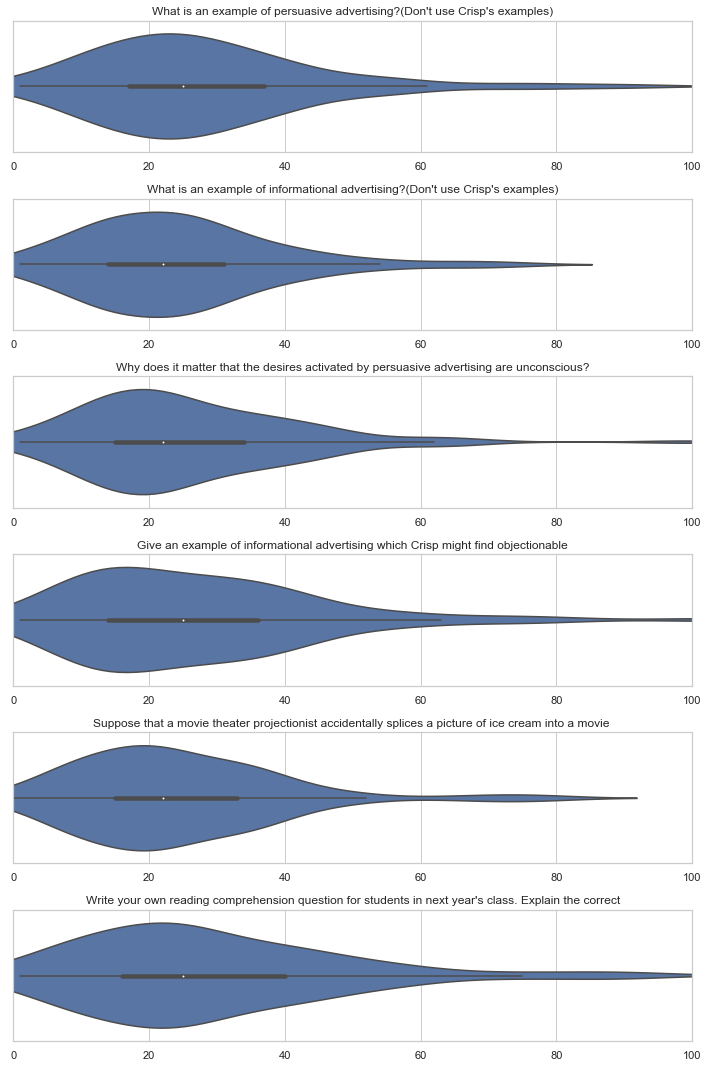

In [176]:
fig, axes = plt.subplots(nrows=len(individual_counts.keys()), figsize=(10,15))
i=0
for c in individual_counts.keys():
    sns.violinplot(individual_counts[c], ax=axes[i])
    axes[i].set_title(c[:100]); axes[i].set_xlim(0,100)
    i += 1
fig.tight_layout()
    

In [166]:
individual_counts

{"What is an example of persuasive advertising?(Don't use Crisp's examples)": [7,
  16,
  25,
  20,
  24,
  22,
  1,
  1,
  16,
  22,
  55,
  29,
  13,
  30,
  19,
  14,
  17,
  30,
  9,
  23,
  19,
  39,
  31,
  34,
  25,
  38,
  27,
  28,
  83,
  16,
  40,
  13,
  56,
  16,
  7,
  28,
  26,
  39,
  17,
  11,
  10,
  37,
  32,
  39,
  11,
  10,
  37,
  15,
  30,
  7,
  12,
  17,
  10,
  22,
  40,
  33,
  21,
  50,
  24,
  39,
  61,
  43,
  21,
  24,
  7,
  38,
  92,
  15,
  15,
  28,
  34,
  21,
  23,
  29,
  23,
  43,
  22,
  30,
  50,
  28,
  29,
  75,
  1,
  12,
  30,
  10,
  38,
  25,
  57,
  34,
  47,
  27,
  47,
  29,
  27,
  19,
  23,
  17,
  35,
  19,
  39,
  72,
  54,
  19,
  23],
 "What is an example of informational advertising?(Don't use Crisp's examples)": [7,
  6,
  22,
  26,
  18,
  27,
  1,
  1,
  16,
  33,
  27,
  8,
  24,
  41,
  20,
  24,
  12,
  15,
  14,
  29,
  27,
  21,
  21,
  33,
  9,
  28,
  12,
  19,
  34,
  14,
  40,
  29,
  36,
  20,
  5,
  14,
  54,
  24,

In [105]:
w = d['1785114']
bag = [make_wordbag(str(a)) for _, a in w.iteritems()]

In [106]:


combined = [w for words in bag for w in words]

In [54]:
for n in ww:
    print(str(n))

* Pathos in ads is an example of persuasive advertising.  It touches your emotions.
Kanye West's sneakers can be an example of persuasive advertising a person may want them to be "cool" but also can want them because of the status these shoes symbolize and wealth.
An example of persuasive advertising can be an Old Spice or an Axe deodorant commercial. Without even having to smell the product, consumers will most likely purchase a specific deodorant due to the images that are explicit in the advertisement such as attracting the opposite sex and having power.
An example of persuasive advertising, according to Crisp, would be if I had a desire to play basketball and an advertisement attempted to sell me shoes that claim to "improve any basketball players performance better than the competition." 
is advertisement that aims to evoke an action or reaction from the customers. 

An example may be one where an insurance car companies, portrays a video of a car accident and plays on people fear

In [103]:
remove

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 "''",
 "'s",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '``',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'did',
 'do',
 'does',
 'doing',
 'don',
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'has',
 'have',
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'it',
 'its',
 'itself',
 'just',
 'me',
 'more',
 'most',
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'now',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 's',
 'same',
 'she',
 'should',
 'so',
 'some',
 'such',
 't',
 'than',
 'that',
 'the',
 'their',
 'the

# Calculate word frequencies in each answer

In [158]:

class WordFreq(object):
    """
    Tools for computing and plotting frequencies of word appearances using the nltk.FreqDist method
    """

    def __init__(self, word_list):
        """
        Args:
            word_list: list of words
        """
        self.data = word_list
        self.unique = sorted(set(self.data))

        assert(type(word_list) is list)
        self.freqDist = nltk.FreqDist(self.data)
        self.ranking = list(self.freqDist.keys())

    def topN(self, number_to_display):
        """
        Returns the N most common items in the dataset

        Args:
            number_to_display: The number to display
        """
        assert(type(number_to_display) is int)
        return self.ranking[0: number_to_display]

    def plot(self, number_to_display, **kwargs):
        """
        Displays a plot of the frequency distribution of item frequencies
        Args:
            number_to_display: The top n to display
        """
        assert(type(number_to_display) is int)
        self.freqDist.plot(number_to_display, cumulative=True, **kwargs)

    def compute_individual_word_freq(self):
        """
        Computes the frequency of individual words

        Returns:
            List of dictionaries with the keys 'word' and 'count'
        """
        fd = nltk.FreqDist()
        for word in self.data:
            fd.inc(word)
        results = []
        for w in fd.items():
            results.append({'word': w[0], 'count' : w[1]})
        return results


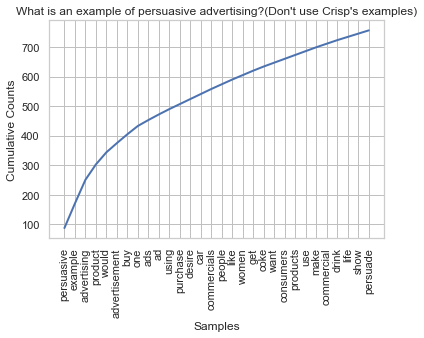

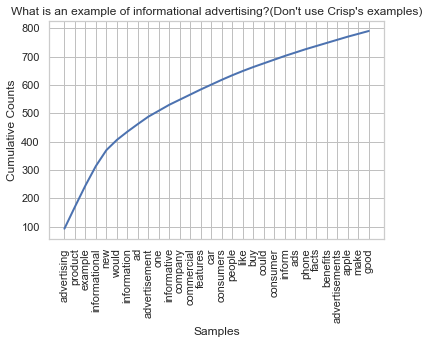

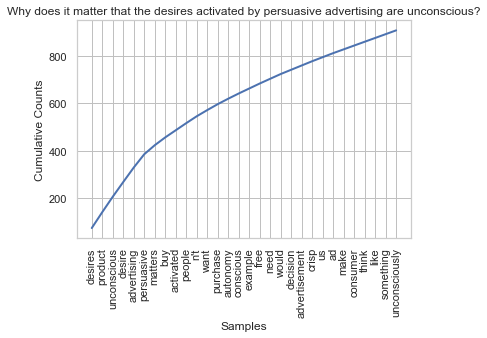

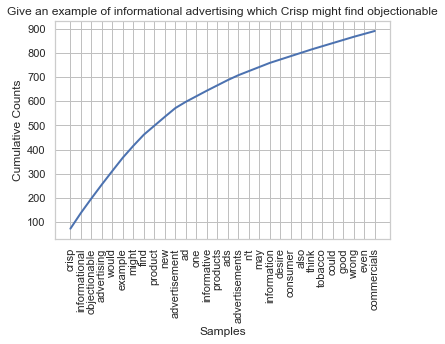

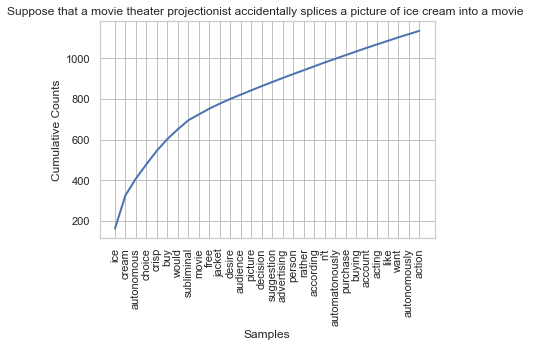

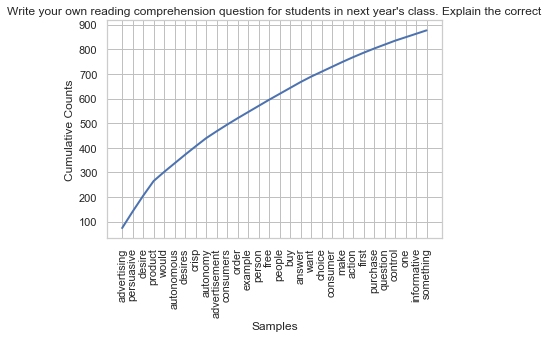

In [178]:
# fig, axes = plt.subplots( figsize=(10,15))
for q in combos.keys():
    wf = WordFreq(combos[q])
    wf.plot(30, title=q[:100])

# fig.tight_layout()

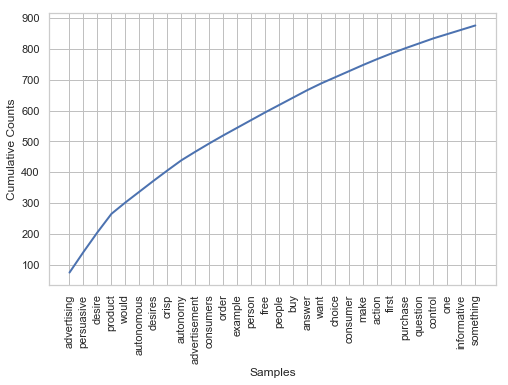

In [164]:
fig, axes = plt.subplots(figsize=(8,5))
wf.plot(30)
fig.tight_layout()

In [154]:
import operator
j = {k: wf.freqDist[k] for k in wf.ranking}
sorted_x = sorted(j.items(), key=operator.itemgetter(1), reverse=True)